In [1]:
import sys
sys.path.append('/Documents/PhD/PyRAMID/')

import pyramid_ct
import matplotlib.pyplot as plt

# 1/ Run a basic example

	Clearing previous save of this case before running


	 ==================== Appending to log ====================

Running case "phantom_Chambolle_Pock_tv_motionType_0_reg_6p250E-02"

 (using 1 chunks) Computing SIRT weights and preconditioner	Done
Initialization	Done

Starting iterations:
[50] 	 Total 5.955259e+02 	 WLS 5.262728e+02 	 TV 6.925308e+01 	 Time [s] 1.7 	 Avg time/it [ms] 36.446
[100] 	 Total 2.533226e+02 	 WLS 1.688487e+02 	 TV 8.447387e+01 	 Time [s] 3.2 	 Avg time/it [ms] 32.358
[150] 	 Total 1.819351e+02 	 WLS 8.980750e+01 	 TV 9.212760e+01 	 Time [s] 4.5 	 Avg time/it [ms] 30.725
[200] 	 Total 1.579430e+02 	 WLS 6.106753e+01 	 TV 9.687543e+01 	 Time [s] 5.9 	 Avg time/it [ms] 29.855
[200] 	 Total 1.579430e+02 	 WLS 6.106753e+01 	 TV 9.687543e+01 	 Time [s] 5.9 	 Avg time/it [ms] 29.855

The case "phantom_Chambolle_Pock_tv_motionType_0_reg_6p250E-02" took: 14.181600093841553 s.


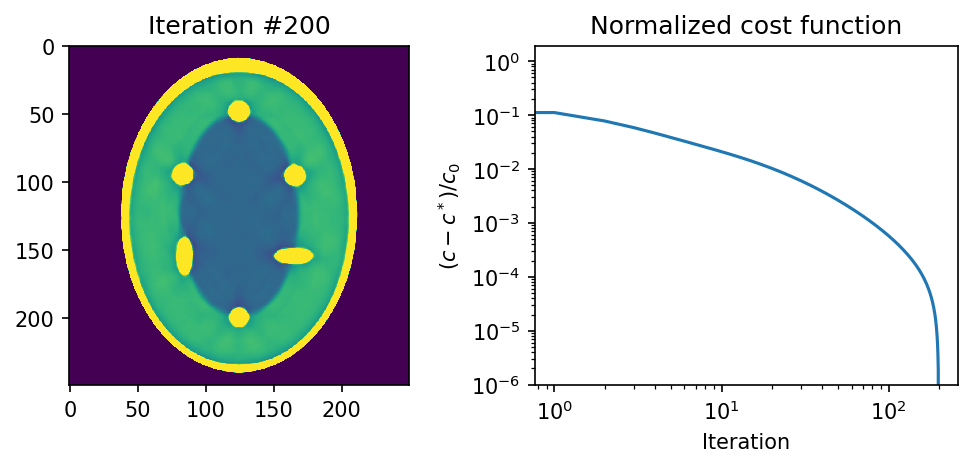

In [2]:
# Load an example static phantom (without any motion)
sino_static = pyramid_ct.utils.example_moving_phantom()

# Run the Chambolle-Pock algorithm for 200 iterations
case = pyramid_ct.Case()
case.set_sinogram_data(sino_static)
case.nb_it = 200
case.reg = pow(2, -4)
case.reg_z = case.reg
case.case_name_prefix = 'phantom_'+case.algorithm_name+'_motionType_0'
case.run()

# Get the loss function and the last reconstruction
x_avg_last_it = case.load_x_avg()
obj_fct = case.obj_fct_sum

# Plot the results
plt.figure(figsize = (8, 3), dpi = 150)
plt.subplot(121)
plt.imshow(x_avg_last_it, vmin = 0.16, vmax = 0.22)
plt.title('Iteration #'+str(case.table_it_save[-1]))
plt.subplot(122)
plt.loglog( (obj_fct - obj_fct.min()) / obj_fct[0])
plt.title('Normalized cost function')
plt.ylabel('$(c-c^*)/c_0$')
plt.xlabel('Iteration')
plt.show()

# 2/ Analyze a case previously run

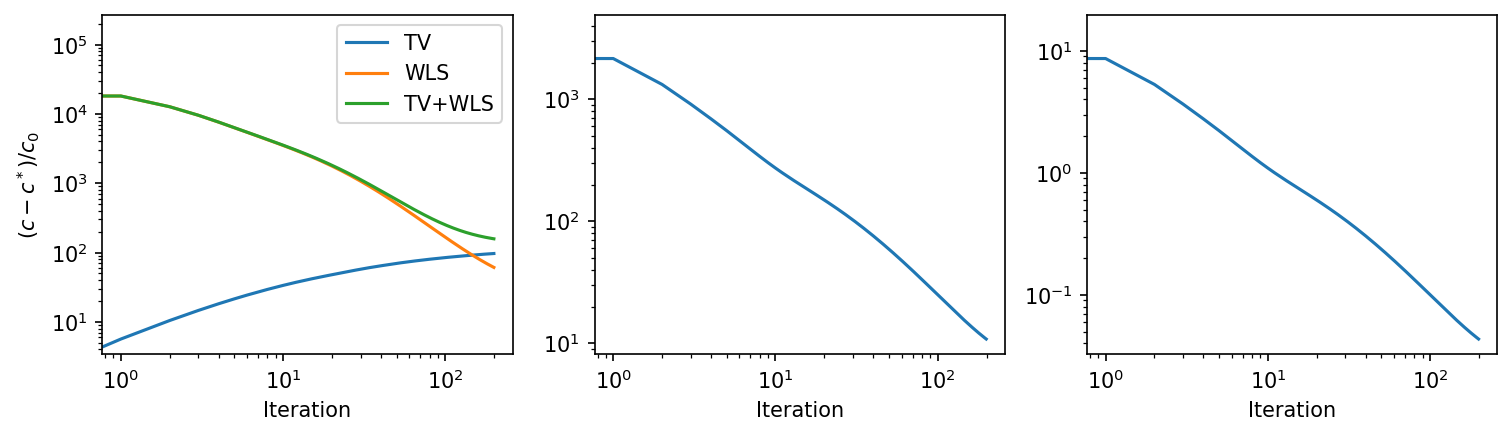

In [4]:
# Load case previously run for analysis
path_to_case_folder = case.path
case = pyramid_ct.Case(path_to_case_folder)

# case.status()
# x_avg_last_it = case.load_x_avg()

plt.figure(figsize = (12, 3), dpi = 150)
plt.subplot(131)
plt.loglog(case.obj_fct_TV, label = 'TV')
plt.loglog(case.obj_fct_WLS, label = 'WLS')
plt.loglog(case.obj_fct_sum, label = 'TV+WLS')
plt.ylabel('$(c-c^*)/c_0$')
plt.xlabel('Iteration')
plt.legend()

plt.subplot(132)
plt.loglog(case.l2_primal_update)
plt.xlabel('Iteration')

plt.subplot(133)
plt.loglog(case.l2_primal_update_normalized)
plt.xlabel('Iteration')

plt.show()

# 3/ Run a case with PLI and motion artifact correction

Example with a moving phantom. Consider four different motions:
    - motion_type = 0: No motion
    - motion_type = 1: Linear continuous motion
    - motion_type = 2: Sudden discrete motion
    - motion_type = 3: Piecewise motion

In [11]:
motion_type = 2
sino = pyramid_ct.utils.example_moving_phantom(motion_type = motion_type)

# Standard reconstruction without PLI
case_no_motion = pyramid_ct.Case()
case_no_motion.load_input_parameters('a_input_Chambolle_Pock.py')
case_no_motion.set_sinogram_data(sino)
case_no_motion.algorithm_name = 'Chambolle_Pock_tv'
case_no_motion.nb_it = 10000
case_no_motion.mask_static_path = pyramid_ct.utils.path_phantom_mask_static()
case_no_motion.case_name_prefix = 'phantom_'+case_no_motion.algorithm_name+'_motionType_'+str(motion_type)
case_no_motion.run()

# Reconstruction with PLI and M = 2
case_M_2 = pyramid_ct.Case()
case_M_2.load_input_parameters('a_input_Chambolle_Pock.py')
case_M_2.set_sinogram_data(sino)
case_M_2.algorithm_name = 'Chambolle_Pock_tv_motion'
case_M_2.M = 2
case_M_2.nb_it = 10000
case_M_2.mask_static_path = pyramid_ct.utils.path_phantom_mask_static()
case_M_2.case_name_prefix = 'phantom_'+case_M_2.algorithm_name+'_motionType_'+str(motion_type)
case_M_2.run()

# Reconstruction with PLI and M = 4
case_M_4 = pyramid_ct.Case()
case_M_4.load_input_parameters('a_input_Chambolle_Pock.py')
case_M_4.set_sinogram_data(sino)
case_M_4.algorithm_name = 'Chambolle_Pock_tv_motion'
case_M_4.M = 4
case_M_4.nb_it = 10000
case_M_4.mask_static_path = pyramid_ct.utils.path_phantom_mask_static()
case_M_4.case_name_prefix = 'phantom_'+case_M_4.algorithm_name+'_motionType_'+str(motion_type)
case_M_4.run()

# Reconstruction with PLI and M = 4, and ideal breakpoints
case_M_4_ideal = pyramid_ct.Case()
case_M_4_ideal.load_input_parameters('a_input_Chambolle_Pock.py')
case_M_4_ideal.set_sinogram_data(sino)
case_M_4_ideal.algorithm_name = 'Chambolle_Pock_tv_motion'
case_M_4_ideal.M = 4
case_M_4_ideal.nb_it = 10000
case_M_4_ideal.mask_static_path = pyramid_ct.utils.path_phantom_mask_static()
case_M_4_ideal.case_name_prefix = 'phantom_idealBreakpoints_'+case_M_4_ideal.algorithm_name+'_motionType_'+str(motion_type)
if motion_type == 2:
    case_M_4_ideal.ind_breakpoints = [0, 90, 91, 200]
elif motion_type == 3:
    case_M_4_ideal.ind_breakpoints = [0, 100, 150, 200]
case_M_4_ideal.run()

	Clearing previous save of this case before running


	 ==================== Appending to log ====================

Running case "phantom_Chambolle_Pock_tv_motionType_2_reg_6p250E-02"

 (using 1 chunks) Computing SIRT weights and preconditioner	Done
Initialization	Done

Starting iterations:
[1000] 	 Total 1.438110e+02 	 WLS 3.066879e+01 	 TV 1.131422e+02 	 Time [s] 15.5 	 Avg time/it [ms] 15.551
[2000] 	 Total 1.436321e+02 	 WLS 2.989700e+01 	 TV 1.137351e+02 	 Time [s] 28.2 	 Avg time/it [ms] 14.134
[3000] 	 Total 1.436237e+02 	 WLS 2.985259e+01 	 TV 1.137711e+02 	 Time [s] 41.0 	 Avg time/it [ms] 13.665
[4000] 	 Total 1.436226e+02 	 WLS 2.984941e+01 	 TV 1.137732e+02 	 Time [s] 53.7 	 Avg time/it [ms] 13.444
[5000] 	 Total 1.436222e+02 	 WLS 2.984928e+01 	 TV 1.137729e+02 	 Time [s] 66.4 	 Avg time/it [ms] 13.295
[6000] 	 Total 1.436220e+02 	 WLS 2.984943e+01 	 TV 1.137725e+02 	 Time [s] 79.1 	 Avg time/it [ms] 13.190
[7000] 	 Total 1.436218e+02 	 WLS 2.984960e+01 	 TV 1.137722e+02 	

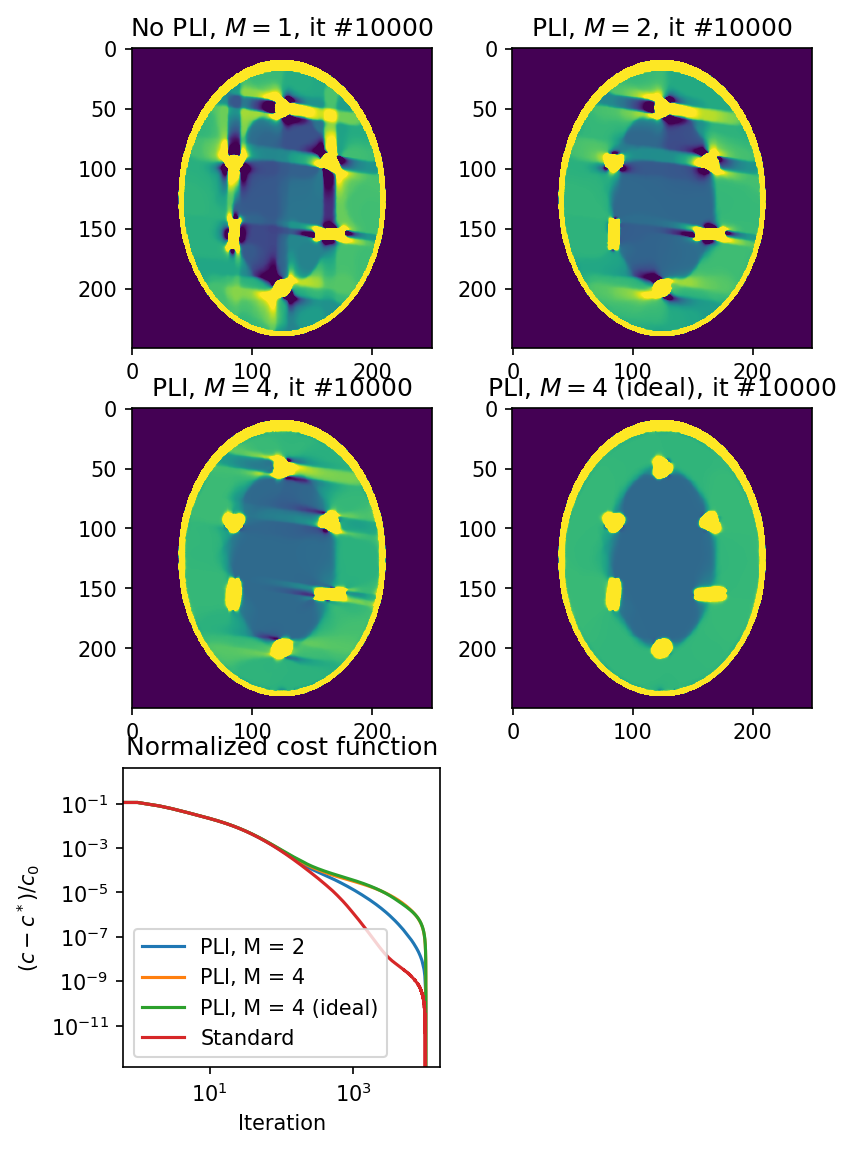

In [12]:
ind_it = -1
ind_slice = 0

x_avg_last_it_M_2 = case_M_2.load_x_avg(ind_iteration = ind_it, ind_slice = ind_slice)
x_last_it_M_2 = case_M_2.load_x(ind_iteration = ind_it, ind_slice = ind_slice)
obj_fct_M_2 = case_M_2.obj_fct_sum

x_avg_last_it_M_4 = case_M_4.load_x_avg(ind_iteration = ind_it, ind_slice = ind_slice)
x_last_it_M_4 = case_M_4.load_x(ind_iteration = ind_it, ind_slice = ind_slice)
obj_fct_M_4 = case_M_4.obj_fct_sum

x_avg_last_it_M_4_ideal = case_M_4_ideal.load_x_avg(ind_iteration = ind_it, ind_slice = ind_slice)
x_last_it_M_4_ideal = case_M_4_ideal.load_x(ind_iteration = ind_it, ind_slice = ind_slice)
obj_fct_M_4_ideal = case_M_4_ideal.obj_fct_sum

x_avg_last_it_no_motion = case_no_motion.load_x_avg(ind_iteration = ind_it, ind_slice = ind_slice)
x_last_it_no_motion = case_no_motion.load_x(ind_iteration = ind_it, ind_slice = ind_slice)
obj_fct_no_motion = case_no_motion.obj_fct_sum

plt.figure(figsize = (6,9), dpi = 150)
plt.subplot(321)
plt.imshow(x_avg_last_it_no_motion, vmin = 0.16, vmax = 0.22)
plt.title('No PLI, $M=1$, it #'+str(case_no_motion.table_it_save[ind_it]))

plt.subplot(322)
plt.imshow(x_avg_last_it_M_2, vmin = 0.16, vmax = 0.22)
plt.title('PLI, $M=2$, it #'+str(case_M_2.table_it_save[ind_it]))

plt.subplot(323)
plt.imshow(x_avg_last_it_M_4, vmin = 0.16, vmax = 0.22)
plt.title('PLI, $M=4$, it #'+str(case_M_4.table_it_save[ind_it]))

plt.subplot(324)
plt.imshow(x_avg_last_it_M_4_ideal, vmin = 0.16, vmax = 0.22)
plt.title('PLI, $M=4$ (ideal), it #'+str(case_M_4.table_it_save[ind_it]))

plt.subplot(325)
plt.loglog( (obj_fct_M_2 - obj_fct_M_2.min()) / obj_fct_M_2[0], label = 'PLI, M = 2')
plt.loglog( (obj_fct_M_4 - obj_fct_M_4.min()) / obj_fct_M_4[0], label = 'PLI, M = 4')
plt.loglog( (obj_fct_M_4_ideal - obj_fct_M_4_ideal.min()) / obj_fct_M_4_ideal[0], label = 'PLI, M = 4 (ideal)')
plt.loglog( (obj_fct_no_motion - obj_fct_no_motion.min()) / obj_fct_no_motion[0], label = 'Standard')
plt.title('Normalized cost function')
plt.ylabel('$(c-c^*)/c_0$')
plt.xlabel('Iteration')
plt.legend()

plt.show()

# 4/ Example with subgradient descent algorithms

In [13]:
motion_type = 1
sino = pyramid_ct.utils.example_moving_phantom(motion_type = motion_type)

# Standard reconstruction without PLI
case_no_motion = pyramid_ct.Case()
case_no_motion.load_input_parameters('a_input_Subgradient_Descent.py')
case_no_motion.set_sinogram_data(sino)
case_no_motion.algorithm_name = 'Gradient_descent_tv'
case_no_motion.nb_it = 10000
case_no_motion.mask_static_path = pyramid_ct.utils.path_phantom_mask_static()
case_no_motion.case_no_motion_name_prefix = 'phantom_'+case_no_motion.algorithm_name+'_motionType_'+str(motion_type)
case_no_motion.run()

# Reconstruction with PLI and M = 2
case = pyramid_ct.Case()
case.load_input_parameters('a_input_Subgradient_Descent.py')
case.set_sinogram_data(sino)
case.algorithm_name = 'Gradient_descent_tv_motion'
case.M = 2
case.nb_it = 10000
case.mask_static_path = pyramid_ct.utils.path_phantom_mask_static()
case.case_name_prefix = 'phantom_'+case.algorithm_name+'_motionType_'+str(motion_type)
case.run()

	Clearing previous save of this case before running


	 ==================== Appending to log ====================

Running case "phantom_Gradient_descent_tv_motion_reg_6p250E-02"

 (using 1 chunks) Computing SIRT weights and preconditioner	Done
Initialization	Done

Starting iterations:
[1000] 	 Total 1.416781e+02 	 WLS 2.779909e+01 	 TV 1.138790e+02 	 Time [s] 10.5 	 Avg time/it [ms] 10.480
[2000] 	 Total 1.415433e+02 	 WLS 2.708667e+01 	 TV 1.144566e+02 	 Time [s] 20.6 	 Avg time/it [ms] 10.314
[3000] 	 Total 1.415392e+02 	 WLS 2.704909e+01 	 TV 1.144901e+02 	 Time [s] 30.7 	 Avg time/it [ms] 10.243
[4000] 	 Total 1.415389e+02 	 WLS 2.704655e+01 	 TV 1.144924e+02 	 Time [s] 41.0 	 Avg time/it [ms] 10.250
[5000] 	 Total 1.415391e+02 	 WLS 2.704643e+01 	 TV 1.144926e+02 	 Time [s] 51.0 	 Avg time/it [ms] 10.214
[6000] 	 Total 1.415388e+02 	 WLS 2.704638e+01 	 TV 1.144924e+02 	 Time [s] 61.2 	 Avg time/it [ms] 10.197
[7000] 	 Total 1.415390e+02 	 WLS 2.704639e+01 	 TV 1.144927e+02 	 Tim

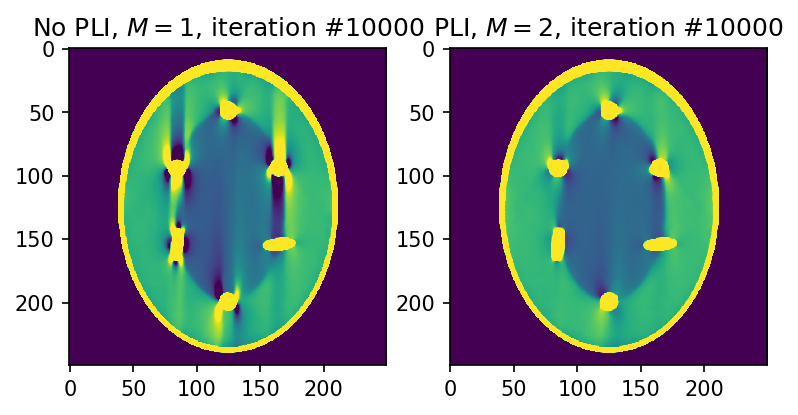

In [14]:
x_avg_last_it_no_motion = case_no_motion.load_x_avg()
x_avg_last_it = case.load_x_avg()

plt.figure(figsize = (6,3), dpi = 150)
plt.subplot(121)
plt.imshow(x_avg_last_it_no_motion, vmin = 0.16, vmax = 0.22)
plt.title('No PLI, $M=1$, iteration #'+str(case_no_motion.table_it_save[-1]))

plt.subplot(122)
plt.imshow(x_avg_last_it, vmin = 0.16, vmax = 0.22)
plt.title('PLI, $M=2$, iteration #'+str(case.table_it_save[-1]))

plt.show()